### 문제1. 아래 주소에서 꽃사진 데이터를 받아서, data_dir 변수에 넣으시오.

 - 주소: https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
 - 폴더 이름: flower_photos
 - 압축 풀기: True

In [1]:
from tensorflow.keras.utils import get_file

data_dir = get_file(fname = 'flower_photos',
                    origin = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                    untar = True)

### 문제2. 경로관련 작업을 쉽게 해주는 라이브러리를 불러와서, data_dir을 인스턴스화 하시오.

In [2]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/white/.keras/datasets/flower_photos')

### 문제3. flower_phtos 폴더를 열고 폴더 이름만큼 클래스 이름이 담긴 리스트를 만드시오.

In [3]:
a = next(data_dir.glob('*.txt'))
dir(a)
a.name

'LICENSE.txt'

In [4]:
CLASS_NAMES = [i.name for i in data_dir.glob('*') if i.name != 'LICENSE.txt']
CLASS_NAMES

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

### 문제4. 케라스 이미지 데이터 제너레이터를 인스턴스화 하시오. 그리고 전체 이미지를 255로 나누어 리스케일링 하시오

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generaotr = ImageDataGenerator(rescale = 1./255)

### 문제5. 이미지데이터 제너레이터를 통해 이미지를 하나 불러오고 shape를 확인해보시오.

In [6]:
imggen = image_generaotr.flow_from_directory(directory=data_dir)

Found 3670 images belonging to 5 classes.


In [7]:
a, b = next(imggen)

In [8]:
a.shape

(32, 256, 256, 3)

### 문제6. 케라스 이미지 제너레이터의 단점은 어떤 것들이 있는가?

1. 느리다.
2. 세밀한 조정이 어렵다.
3. 텐서플로와 연동이 안 되는 부분이 있다.

### 문제7. 텐서플로로 이미지를 하나만 불러오시오.

In [9]:
import pathlib
import os
import tensorflow as tf

In [12]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [22]:
a = next(data_dir.glob('*/*'))

In [35]:
img = tf.io.read_file(str(a))
img = tf.image.decode_jpeg(img, channels = 1) # ★★★
img = tf.image.convert_image_dtype(img, dtype = tf.float32) # ★★★

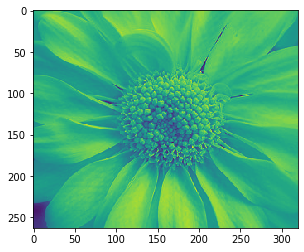

In [36]:
import matplotlib.pyplot as plt
plt.imshow(img.numpy().reshape(img.shape[0], img.shape[1]))

### 문제8. 텐서플로를 이용하여 이미지 폴더에서 라벨을 추출해보시오. 그 라벨을 원핫 벡터로 반환해보시오.

In [42]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [58]:
a = next(iter(list_ds.take(1)))

In [64]:
tf.strings.split(a, os.path.sep)[-2] == CLASS_NAMES

<tf.Tensor: id=515, shape=(5,), dtype=bool, numpy=array([False, False, False, False,  True])>

### 문제9. 이미지를 하나 불러와서 다음의 2가지 리턴값이 나오게 하는 함수를 만들어보시오.

1. 디코드된 이미지 (float32)
2. 원핫 라벨

In [70]:
def get_label(file_path):
    a = tf.strings.split(file_path, os.path.sep)
    return a[-2] == CLASS_NAMES

rst = list_ds.map(get_label)

In [72]:
for i in rst.take(5):
    print(i)

tf.Tensor([False False False False  True], shape=(5,), dtype=bool)
tf.Tensor([False False  True False False], shape=(5,), dtype=bool)
tf.Tensor([False False False False  True], shape=(5,), dtype=bool)
tf.Tensor([ True False False False False], shape=(5,), dtype=bool)
tf.Tensor([False False False  True False], shape=(5,), dtype=bool)


In [80]:
def decode_img(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels = 1)
    img = tf.image.convert_image_dtype(img, dtype = tf.float32)
    return tf.image.resize(img, [255, 255])

dd = list_ds.map(decode_img)

In [84]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

def process_path(file_path):
    labels = get_label(file_path)
    img = decode_img(file_path)
    return img, labels

ddd = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

### 문제10. 그라디언트 테잎을 이용하여 아래 텐서를 미분한 결과를 구하시오. 손실함수는 아무거나 사용하시오.

a = tf.ones((2, 2))

In [97]:
x = tf.ones((2, 2))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)
t.gradient(z, x)

<tf.Tensor: id=1050, shape=(2, 2), dtype=float32, numpy=
array([[8., 8.],
       [8., 8.]], dtype=float32)>

### 문제11. 그라디언트 테잎으로 중간값 y의 결과를 확인해보시오.

In [100]:
x = tf.ones((2, 2))

with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)
t.gradient(z, y).numpy()

8.0